
<h2>Project Background</h2> 

A data analyst wants to conduct an investigation about the correlation of each variables on medical health charges patient data.


<h3>Unveiling the impact of Variables: Defining the problems</h3>

+ Which variables exert a significant influence with patient medical charges?
+ Does the Sex variable correlates with patient medical charges?
+ Does the Smoker variable correlates with patient medical charges?
+ Does the Region variable correlates with patient medical charges?
+ Does the Age variable correlates with patient medical charges?
+ Does the Bmi (body mass index) variable correlates with patient medical charges?
+ Does the Children variable correlates with patient medical charges?

<h2>Import Module</h2>

In [1]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.style.use('bmh')
sns.set()

<h2>Call the data</h2>

In [2]:
# Call the data
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h1>a. Begin Data Cleaning</h1>

<h2>1. Handling Outliers</h2>

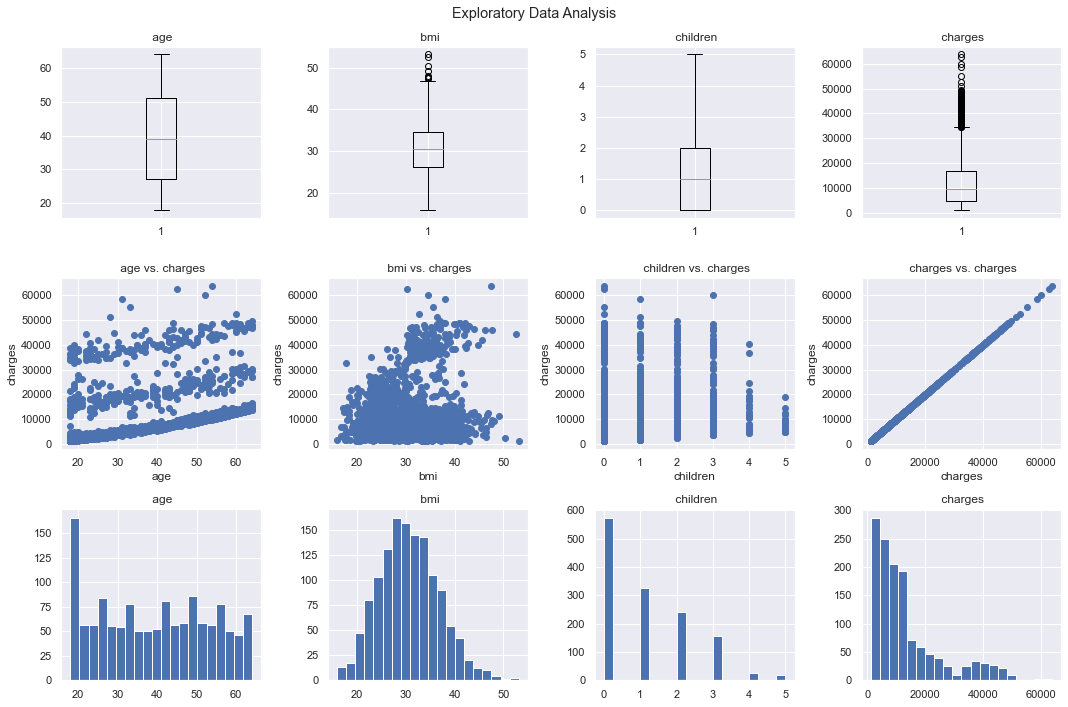

In [3]:
#Perform EDA to see the outliers

# Select numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Set up subplots
fig, axs = plt.subplots(3, len(numeric_cols), figsize=(15, 10))
fig.suptitle('Exploratory Data Analysis')

# Box plot
for i, col in enumerate(numeric_cols):
    axs[0, i].boxplot(df[col])
    axs[0, i].set_title(f' {col}')

# Scatter plot
for i, col in enumerate(numeric_cols):
    axs[1, i].scatter(df[col], df['charges'])
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel('charges')
    axs[1, i].set_title(f' {col} vs. charges')

# Histogram
for i, col in enumerate(numeric_cols):
    axs[2, i].hist(df[col], bins=20)
    axs[2, i].set_title(f' {col}')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

Answer: There's an outlier from "bmi" and "charges" figure, although "age" and "children" does not indicating outliers but we have to check more thorough.

<h3>Calculate the variables using IQR to identify the outliers</h3>

In [4]:
#Create function to identify by calculate the upper and lower limits of outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile
    low_limit = quartile1 - 1.5 * interquartile
    return low_limit, up_limit

#Create function to determine the value
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

<h3>Call the function to determine the outlier</h3>

In [5]:
#Only works for numeric variables, does not work with categorical variables.
columns_ = ["bmi", "charges", "age","children"]
for col in columns_:
    print(col, check_outlier(df, col))

bmi True
charges True
age False
children False


Answer: The "age" and "children" does not have an outliers as stated on the code aboves.

<h3>Visualize the variables that has an outlier</h3>

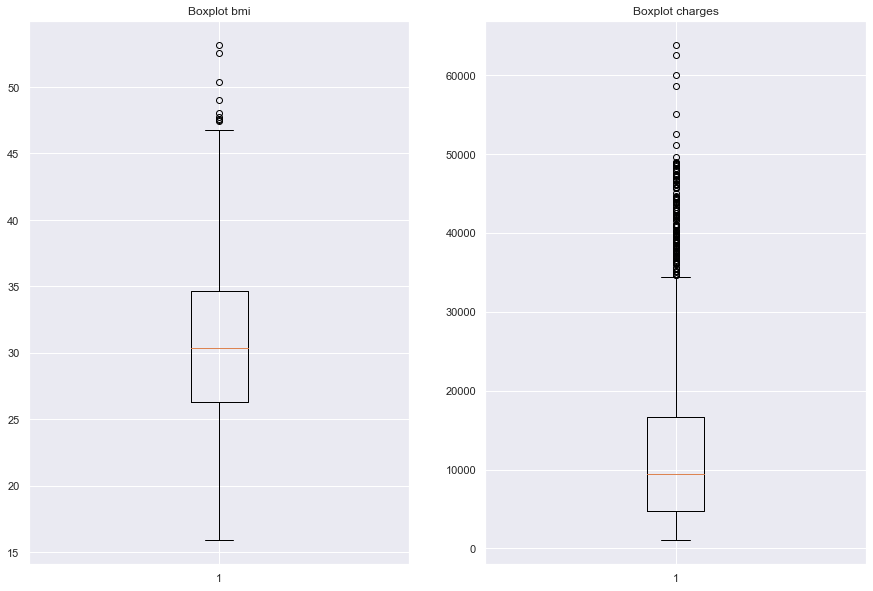

In [6]:
columns = ["bmi", "charges"]
index = 0
fig, ax = plt.subplots(1,2, figsize = (15,10)) 
for row in range(1):
    for col in range(2):
        ax[col].boxplot(df[columns[index]])
        ax[col].set_title(f"Boxplot {columns[index]}")
        index += 1
plt.show()

There's significant outliers that we need to reduce on both variables.

<h3>Now, remove the outliers</h3>

In [7]:
#Create function to remove the outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
#Replace the data-frame that not affected with outliers
for col in columns_:
    replace_with_thresholds(df, col)

<h3>Create visualization for both columns to check</h3>

<AxesSubplot:xlabel='charges'>

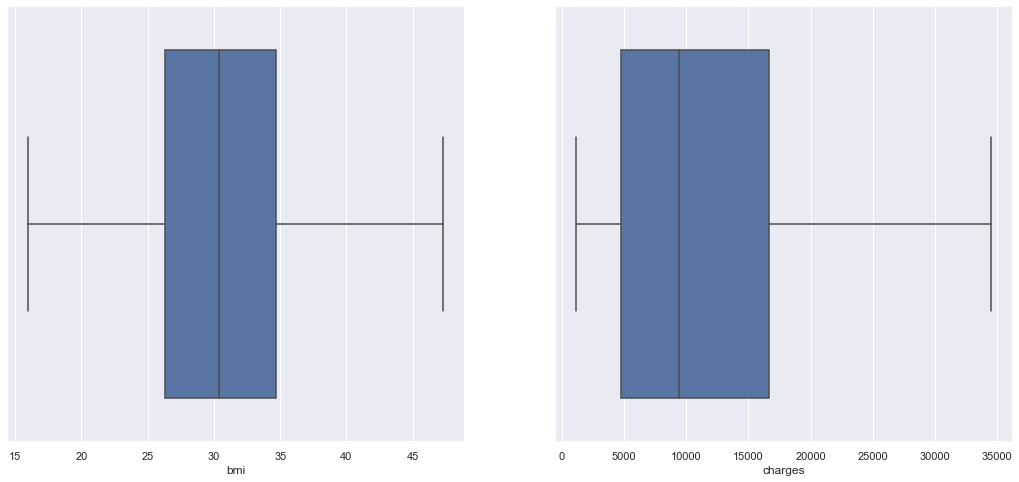

In [8]:
#Create visualization for both columns

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(data=df,x="bmi")

plt.subplot(1,2,2)
sns.boxplot(data=df,x="charges")


Both variables are now free from outliers!

<h2>2. Handling Duplicates</h2>

In [9]:
# Check the data Frame
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
#Drop the duplicates away
df.drop_duplicates(keep = "first", inplace = True)

df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


We have remove the duplicates.

<h2>3. Uniforming Data Type</h2>

In [11]:
#Check if there's unconsistent Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Every **Dtype** has already uniformed with the expected column.

<h1>b. Exploratory Data Analysis</h1>

Creating a function that specifically designed to handle the visualization, to avoids the need for redundant and excessive lines of code.

In [12]:
#Create function to show the visualization based on boxplot
def Boxplot(df,y,x,title,hue=None):
    fig, ax = plt.subplots(figsize = (8,5))
    sns.boxplot(x = x, y = y, hue = hue, data = df, ax = ax)
    ax.set_title(title)
    plt.show()
    
#Create function to show the visualization based on pointplot
def Pointplot(df,y,x,title):
    fig, ax = plt.subplots(figsize = (8,5))
    sns.pointplot(y = y, x = x, data = df, ax = ax)
    ax.set_title(title)
    plt.show()

Show the distribution from charges based on **Sex category** using boxplot

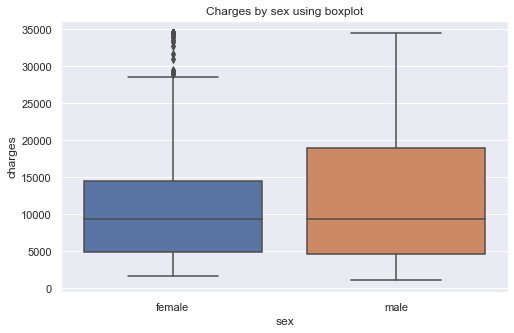

In [13]:
Boxplot(df,"charges","sex","Charges by sex using boxplot")

Show the average of charges based on **Sex category** using pointplot

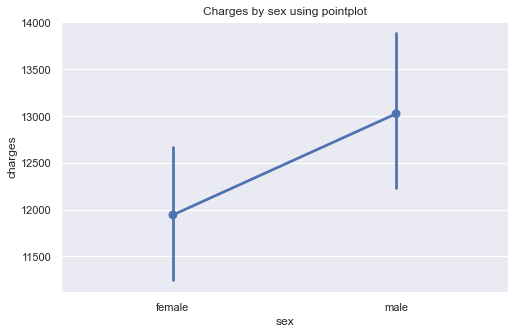

In [14]:
Pointplot(df,"charges","sex","Charges by sex using pointplot")

**Explaination:** As we can see, there was a diffrent distributions of charges between Male and Female. Based on the visualization above, Female Charges has a high tendency compared with Male Charges 

Show the distribution from charges based on **Smoker category** using boxplot

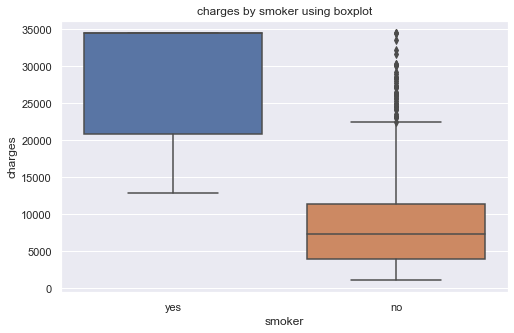

In [15]:
Boxplot(df,"charges","smoker","charges by smoker using boxplot")

Show the average of charges based on **Smoker category** using pointplot

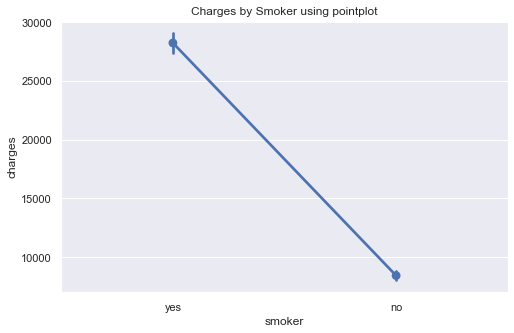

In [16]:
Pointplot(df,"charges","smoker","Charges by Smoker using pointplot")

**Explaination:** There was a different distributions of charges between Smoker and Non Smoker. Based on the visualization above, Smoker Charges has a high tendency compared with Non Smoker.

Show the distribution from charges based on **Region Status** using boxplot

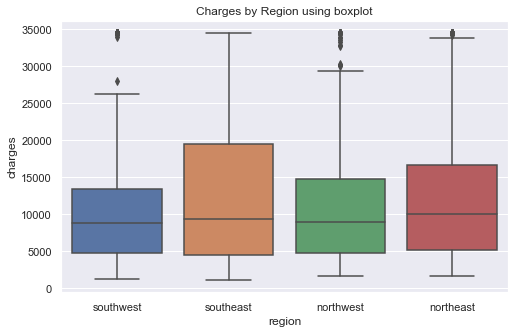

In [17]:
Boxplot(df,"charges","region","Charges by Region using boxplot")

Show the average of charges based on **Region status** using pointplot

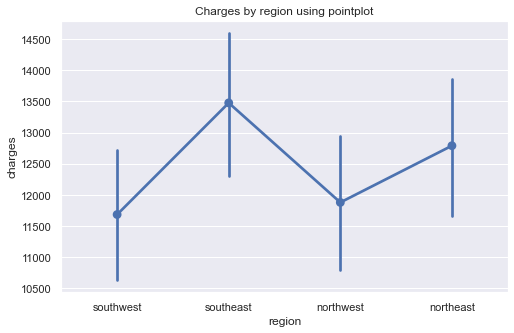

In [18]:
Pointplot(df,"charges","region","Charges by region using pointplot")

**Explaination:** There was a different distributions of charges to multiple Regions. Based on the visualization above, Southeast region has the highest charges compared to its other category.

Show the multiple distributions of charges based on **Sex and Smoker category** using Boxplot

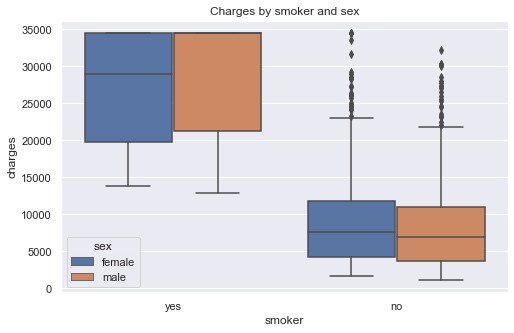

In [19]:
Boxplot(df,"charges","smoker","Charges by smoker and sex","sex")

Show the multiple distributions of charges based on **Region and Smoker category** using Boxplot

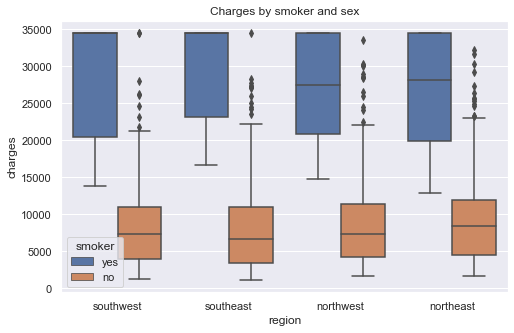

In [20]:
Boxplot(df,"charges","region","Charges by smoker and sex","smoker")

Show the multiple distributions of charges based on **Region and Sex** using Boxplot

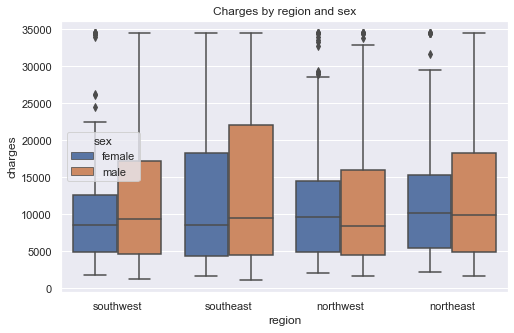

In [21]:
Boxplot(df,"charges","region","Charges by region and sex","sex")

**Explaination of the multiple distributions on boxplot visualization:** Smokers charges are significantly high compared with non smokers. This applies with the entire region as the overall median smokers to 4 region are relatively high compared with non smokers, with Male dominating number of charges compared with female.  

<H1>c. Perform Statistical Test</H1>

In [22]:
# Import module to perform statistical test
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

<h2> 1. Conduct a statistical test for Charges with Sex category.</h2>

In [23]:
#Statistical Test for Charges with Sex

male = df[df["sex"]== "male"]["charges"] #Variable for male category
female = df[df["sex"]== "female"]["charges"] #Variable for female category

v_male = male.shape[0] #Count male category
v_female = female.shape[0] #Count female category
result = ttest_ind(male, female, equal_var = True, random_state = 42, alternative= "greater")


print(f'Total Sample from Male Category = {v_male}')
print(f'Total Sample from Female Category = {v_female}')
print('='*50)

print('Define a hypothesis and Level of Significance:')
print('H0 : mu_Male - mu_Female <= 0')
print('H1 : mu_Male - mu_Female > 0')
print("Decide Level of significance, alpha = 0.05")
print("="*50)

print(f"Count the Statistics = {result[0]}")
print(f"P Value = {result[1]}")

print("="*50)
print("Conclusion :")

if result[1] < 0.05:
    print("h0 rejected")
else:
    print("fail to reject h0")

Total Sample from Male Category = 675
Total Sample from Female Category = 662
Define a hypothesis and Level of Significance:
H0 : mu_Male - mu_Female <= 0
H1 : mu_Male - mu_Female > 0
Decide Level of significance, alpha = 0.05
Count the Statistics = 1.9448852305296473
P Value = 0.025999269154026873
Conclusion :
h0 rejected


**Answer:** Reject the H0. P Value considered small compared with alpha value. (0.025 < 0.05)
If the P Value < Alpha, There's a significant difference between Male Charges with Female Charges.

<h2> 2. Conduct a statistical test for Charges with Smoker category.</h2>

In [24]:
#Statistical Test for Charges dengan smoker

smokers = df[df["smoker"]== "yes"]["charges"] #Variable for smoker category
non_smokers = df[df["smoker"]== "no"]["charges"] #Variable for non smoker category

v_smokers = smokers.shape[0] #Count smoker category
v_non_smokers = non_smokers.shape[0] #Count non smoker category
result = ttest_ind(smokers, non_smokers, equal_var = True, random_state = 42, alternative= "greater")


print(f'Total sample for Smokers = {v_smokers}')
print(f'Total sample for Non Smokers = {v_non_smokers}')
print('='*50)

print('Define a hypothesis and Level of Significance:')
print('H0 : mu_smokers - mu_non_smokers <= 0')
print('H1 : mu_smokers - mu_non_smokers > 0')
print("Decide Level of significance, alpha = 0.05")
print("="*50)

print(f"Count the statistics = {result[0]}")
print(f"P Value = {result[1]}")

print("="*50)
print("Conclusion :")

if result[1] < 0.05:
    print("h0 rejected")
else:
    print("fail to reject h0")

Total sample for Smokers = 274
Total sample for Non Smokers = 1063
Define a hypothesis and Level of Significance:
H0 : mu_smokers - mu_non_smokers <= 0
H1 : mu_smokers - mu_non_smokers > 0
Decide Level of significance, alpha = 0.05
Count the statistics = 46.44754486289592
P Value = 2.333976455873958e-281
Conclusion :
h0 rejected


**Answer:** Reject the H0. P Value considered small compared with alpha value. (0.0002333 < 0.05)
If the P Value < Alpha, There's a significant difference between Smokers Charges with Non Smokers Charges.

<h2>3. Conduct the Analysis of Variance (ANOVA)</h2>

ANOVA is to allow a test to multiple variable or more than two groups. This is works for **Region Category** due to its multiple groups in one variable.

In [25]:
# Condact ANOVA Test to see its influences of Charges with Region

print("Define a hypothesis and Level of Significance::")
print("H0 : mu_Northwest = mu_Northeast = mu_Southwest = mu_Southeast")
print("H1 : At least, there is one is significant")
print("Alpha = 0.05")

region_category = ols('charges ~ region ', data = df).fit() # Syntax to make linear equation between Charges and Region
aov_table_1 = sm.stats.anova_lm(region_category) # Call the ANOVA test

print("="*50)
print("ANOVA Test Result :")
print(aov_table_1)
print("="*50)
print("Conclusion :")
print("Fail to reject H0")

Define a hypothesis and Level of Significance::
H0 : mu_Northwest = mu_Northeast = mu_Southwest = mu_Southeast
H1 : At least, there is one is significant
Alpha = 0.05
ANOVA Test Result :
              df        sum_sq       mean_sq         F    PR(>F)
region       3.0  7.135562e+08  2.378521e+08  2.312112  0.074461
Residual  1333.0  1.371287e+11  1.028722e+08       NaN       NaN
Conclusion :
Fail to reject H0


**Answer:** After conducting ANOVA test, it has been defined that the p-value > 0.05, so we failed to reject H0 as there are no significant between the region and charges.

<h2> 4. Visualize the interaction </h2>

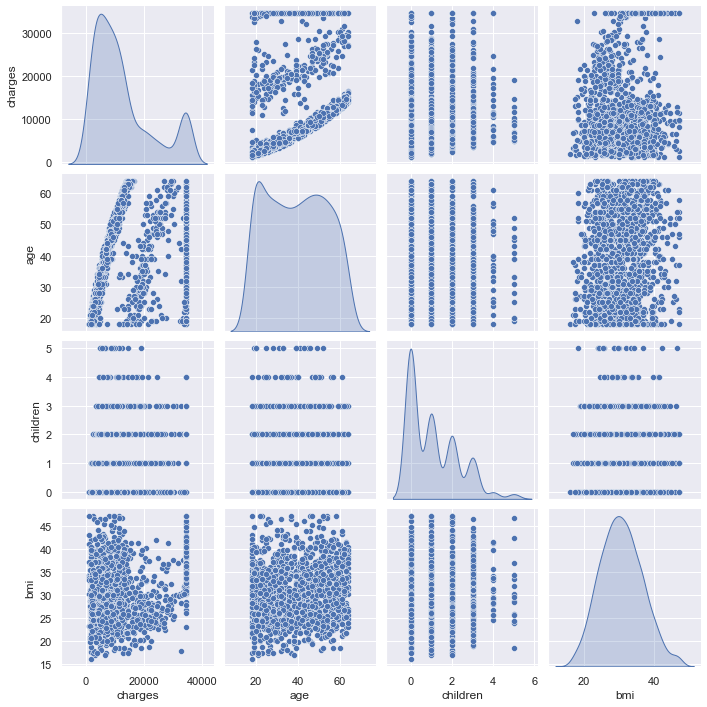

In [26]:
# Make a visualization to see the interaction of entire variables in the dataset using scatter plot and kde plot.
columns_ = ["charges","age", "children","bmi","smoker","sex","region"]
sns.pairplot(df[columns_], diag_kind = 'kde')
plt.show()

<h3>Correlation between Numeric Variables</h3>

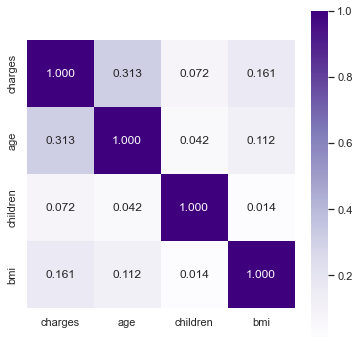

In [27]:
# Kode di bawah untuk melihat korelasi antar features.
# The code is to visualize the correlation between variable
columns = ["charges","age", "children","bmi"]
corr_ = df[columns].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_, cmap='Purples', fmt= ".3f", annot= True,square= True)

plt.show()

**Answer:** As we can see on the graphics, the highest correlation score for charges is the age (0.313). After that, we can conclude that bmi and children can be remove as it yields a low score correlation with charges.

<h2> 5. Develop a Regression Model </h2>

<h3> Exclude variables that not significant </h3>

In [28]:
# Exclude the variables
df.drop(['bmi', 'children','region'], axis=1, inplace = True)
df

,age,sex,smoker,charges
0,19,female,yes,16884.92400
1,18,male,no,1725.55230
2,28,male,no,4449.46200
3,33,male,no,21984.47061
4,32,male,no,3866.85520
...,...,...,...,...
1333,50,male,no,10600.54830
1334,18,female,no,2205.98080
1335,18,female,no,1629.83350
1336,21,female,no,2007.94500


Now, we only have age, sex, smoker, and charges

<h3> Import the module for the linear regression model</h3>

In [29]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

<h3> It is necessary to encode the categoric variable into numeric </h3>


In [30]:
#Encode the data
encoded_df = pd.get_dummies(data = df, columns = ['sex','smoker'])
encoded_df

,age,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,16884.92400,1,0,0,1
1,18,1725.55230,0,1,1,0
2,28,4449.46200,0,1,1,0
3,33,21984.47061,0,1,1,0
4,32,3866.85520,0,1,1,0
...,...,...,...,...,...,...
1333,50,10600.54830,0,1,1,0
1334,18,2205.98080,1,0,1,0
1335,18,1629.83350,1,0,1,0
1336,21,2007.94500,1,0,1,0


<h3>Construct the model with Ordinary Least Square Regression (OLS)</h3>

In [31]:
#Construct the model with OLS
linear_model = smf.ols('charges ~ age + sex_female + sex_male + smoker_no + smoker_yes', data = encoded_df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:05:11   Log-Likelihood:                -13360.
No. Observations:                1337   AIC:                         2.673e+04
Df Residuals:                    1333   BIC:                         2.675e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4470.3441    220.398     20.283      0.0

<h1>d. Analysis and Interpretation</h1>

<h3>After conducting EDA & Statistical test, here's the analysis that we found:</h3>

**Which variables exert a significant influence with patient medical charges?**
    <li>Answer: There are two major variables that influence the medical charges, which is Smoker and Sex variables.</li>
    
**Does the Sex variable corellates with patient medical charges?**
    <li>Answer: Sex variables corellates with the medical charges. With Male have a significant tendency to have high charges compared to Female.</li> 
        
**Does the Smoker variable corellates with patient medical charges?**
    <li>Answer: Smoker variable does corellates with patient medical charges. There's a different tendency that Smokers predominantly have a higher charges than Non Smokers</li>
    
**Does the Region variable corellates with patient medical charges?**
<li>Answer: There is no significant differences between Charges and Region as per the statistics defined in ANOVA test</li>

**Does the Age variable corellates with patient medical charges?**
<li>Answer: There's indifferent higher score with other variables like Bmi and Children but still inadequate to justify the correlation between Age and Charges. It shows us <b>0.313</b> which is a sign of a weak correlation as per conducting pearson correlation test.</li>

**Does the Bmi (body mass index) variable corellates with patient medical charges?**
<li>Answer: There's a little correlation between Bmi and Charges. It shows us <b>0.061</b> which is a sign of a weak correlation as per conducting pearson correlation test</li>

**Does the Children variable corellates with patient medical charges?**
<li>Answer: There's a little correlation between Children and Charges. It shows us <b>0.073</b> which is a sign of a weak correlation as per conducting pearson correlation test

<h1>e. Suggestion and Conclusion</h1>

**Our concern is laser-focusing on Sex and Smoker factor.** 
<li>The fact that Smokers and Sex affects the significant numbers of charges in medical payments. There are factors we can do to reduce the high charges, which is: Although smokers predominantly are Male gender, both female and male should practice healthier lifestyle progressively, especially for middle to low income to avoid default, unstability, and loss.</li>
    

**© 2023, Abhi Abduh**